

# Project: Investigate the TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This notebook looks into using Python-based Data Science Libraries in an attempt to investigate the TMDb Movie dataset.  

### Data 

The original dataset contains information of  10k + movies cleaned from the original TMdb movie data on kaggle. The movies in the dataset were released between the year 1960–2015 and some other features of the information in the dataset includes genre, popularity, budget and revenue.

### Questions 
We will try to respond the below questions :  

- Research Question 1:  Which year has the highest release of movies?
- Research Question 2 : What's the relationship between the movie's budget and revenue ?
- Research Question 3 : How did the revenue change over time ?
- Research Question 4 : What insights do we have about the top 10 movies of all time ? 




We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation

In [1]:


# Regular Exploratory data analysis and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the TMDB dataset for analysis. 

### General Properties

In [2]:
# Load the dataset
movie_data = pd.read_csv("tmdb-movies.csv")
movie_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
movie_data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [4]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

We have in total 10866 rows and 21 columns

 Let's check for descriptive statistics (mean, standard deviation, and quartiles)

In [5]:
movie_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The oldest movie was created in 1960 and the newest one from 2015
The average runtime is 102 minutes, whereas the average rating is approximately 6/10

In [6]:
# Let's check the number of missing values
movie_data.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Now that we have null values, let's fill them using 'fillna'

In [7]:
movie_data = movie_data.fillna(0)

Let's check if there is still null values 

In [8]:
movie_data.isna().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

Let's visualise in order to confirm there is no missing data using seaborn heatmap

### Data Cleaning 

After discussing the structure of the data and any problems that need to be
cleaned, we will be performing these cleaning steps in this section.

In the data cleaning process, the data set will be de-duplicated, delete irrelevant columns, modify data types, rename columns, handle missing values, and organize and add data.

1. Removing Duplicate Rows
2. Changing Format Of Release Date Into Datetime Format
3. Removing non significative columns 
4. Dropping rows containing incorrect or inappropriate values
5. Separating the genre variable into a suitable type

##### 1. Removing Duplicated Rows

In [9]:
# Check for duplicated data
sum(movie_data.duplicated()) 

1

There is one duplicated row.

In [10]:
# After calculating the duplicate row we can drop these row using 'drop_duplicates()' function
movie_data.drop_duplicates(inplace = True)


#####  2. Changing Format Of Release Date Into Datetime Format
the given date in the dataset is in string format so we must change it to datetime format

In [11]:
movie_data['release_date'] = pd.to_datetime(movie_data['release_date'])
movie_data['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

#####   3. Removing non relevant columns
I will 
The monetary variables (budget and revenue) we will use are the ones taking inflation into account, so delete the original two columns of'revenue' and'budget'.

Also the since we have a release_year, we don't need the release_date

in addition i will delete the columns 'id', 'imdb_id', 'popularity', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'vote_count' 


In [12]:
# Removing irrelevant columns
movie_data.drop(['id', 'imdb_id', 'popularity', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'vote_count','release_date', 'budget', 'revenue'], axis = 1, inplace = True)
movie_data.head()

,original_title,director,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08
2,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
4,Furious 7,James Wan,137,Action|Crime|Thriller,7.3,2015,1.747999e+08,1.385749e+09


Let's also rename budget_adj and revenue_adj to just budget and revenue respectively

In [13]:
movie_data.rename(columns={'budget_adj':'budget', 'revenue_adj':'revenue'}, inplace=True)
movie_data.head()

,original_title,director,runtime,genres,vote_average,release_year,budget,revenue
0,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08
2,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
4,Furious 7,James Wan,137,Action|Crime|Thriller,7.3,2015,1.747999e+08,1.385749e+09


##### 4. Drop  rows containing incorrect or inappropriate values

there are a lot of movie with runtime = 0 wich is not possible/appropriate.

Let's determine them in order to drop them 

In [14]:
# Movies with runtime equals zero minutes
movie_data[movie_data['runtime']==0]

,original_title,director,runtime,genres,vote_average,release_year,budget,revenue
92,Mythica: The Necromancer,A. Todd Smith,0,Fantasy|Action|Adventure,5.4,2015,0.000000e+00,0.0
334,Ronaldo,Anthony Wonke,0,Documentary,6.5,2015,0.000000e+00,0.0
410,Anarchy Parlor,Kenny Gage|Devon Downs,0,Horror,5.6,2015,0.000000e+00,0.0
445,The Exorcism of Molly Hartley,Steven R. Monroe,0,Horror,5.0,2015,0.000000e+00,0.0
486,If There Be Thorns,Nancy Savoca,0,TV Movie|Drama,5.4,2015,0.000000e+00,0.0
595,Deep Dark,Michael Medaglia,0,Horror,4.6,2015,0.000000e+00,0.0
616,The Outfield,Michael Goldfine,0,Drama|Comedy,6.6,2015,0.000000e+00,0.0
1241,Dance-Off,0,0,Romance|Music|Comedy,5.7,2014,0.000000e+00,0.0
1289,Treehouse,Michael G. Bartlett,0,Thriller|Horror|Mystery,3.4,2014,2.993546e+06,0.0
1293,Tim Maia,Mauro Lima,0,Documentary|Drama|Music,6.0,2014,0.000000e+00,0.0


In [15]:
movie_data.query('runtime==0').count()

original_title    31
director          31
runtime           31
genres            31
vote_average      31
release_year      31
budget            31
revenue           31
dtype: int64

There are 31 movies. 

Let's drop them and continue with our analysis

In [16]:
movie_data.drop(movie_data[movie_data.runtime==0].index, inplace=True)
movie_data.query('runtime==0').count().sum()

0

In [17]:
movie_data.head()

,original_title,director,runtime,genres,vote_average,release_year,budget,revenue
0,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08
2,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
4,Furious 7,James Wan,137,Action|Crime|Thriller,7.3,2015,1.747999e+08,1.385749e+09


In [18]:
movie_data.genres.unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

It seems we have genres of the movie as string separated by | symbol. This needs to be converted into a suitable type in order to use it. 

##### 5. Separating the genre variable into a suitable type

In [19]:
## Let's define a separator 
def splitbyseperator(column,seperator):
    return column.str.split(seperator,expand=True)

In [20]:
## Let's create a copy of genre column
movie_data_copy_genre = movie_data.copy()

In [21]:
## split the genre column and convert it to an array 
movie_data_copy_genre['genres'] = movie_data_copy_genre.genres.str.split('|')

In [22]:
## use the explode function to give each genre its individual row
movie_data_genre_multiple = movie_data_copy_genre.explode('genres')
movie_data_genre_multiple.head()

,original_title,director,runtime,genres,vote_average,release_year,budget,revenue
0,Jurassic World,Colin Trevorrow,124,Action,6.5,2015,1.379999e+08,1.392446e+09
0,Jurassic World,Colin Trevorrow,124,Adventure,6.5,2015,1.379999e+08,1.392446e+09
0,Jurassic World,Colin Trevorrow,124,Science Fiction,6.5,2015,1.379999e+08,1.392446e+09
0,Jurassic World,Colin Trevorrow,124,Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,George Miller,120,Action,7.1,2015,1.379999e+08,3.481613e+08


<a id='eda'></a>
## Exploratory Data Analysis

> Now that we trimmed and cleaned our data, we're ready to move on to exploration to answer the three research question stated in the beginning of the notebook

### Research Question 1 :  Which year has the highest release of movies?

To answer this question, let's use the matplotlib library to plot both variables against each other 

Let' count the number of movies in each year 

In [42]:
data = movie_data.groupby('release_year').count()['original_title']

Now let's visualise number of movie releases each year to determine the year with the highest releases 

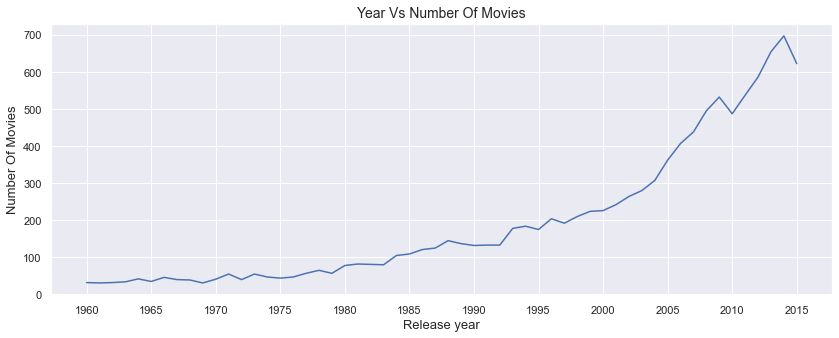

In [41]:
data.plot(xticks = np.arange(1960,2016,5))
sns.set(rc={'figure.figsize':(14,5)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13);


From the  the output we can conclude that year 2014 year had the highest release of movies wich was 700.

### Research Question 2 : What's the relationship between the movie's budget and revenue ?

/Users/badr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/Users/badr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


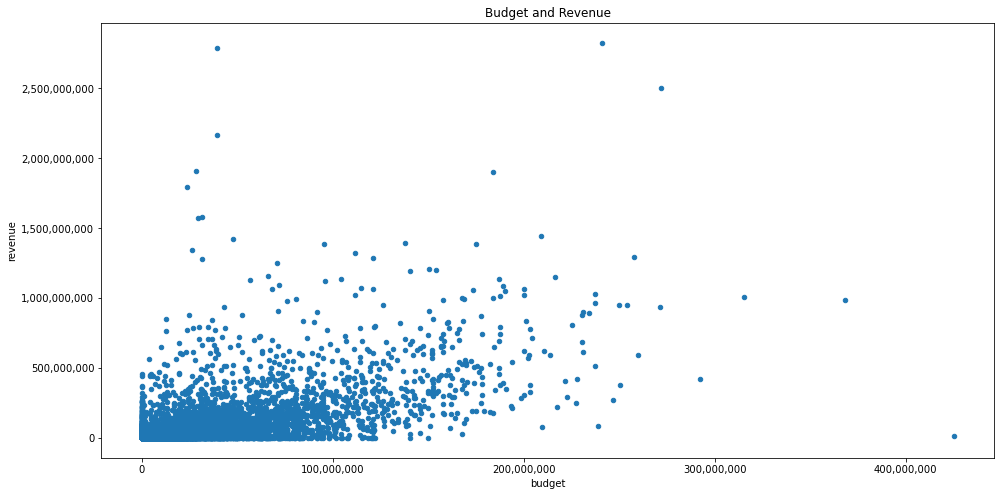

In [23]:
ax = movie_data.plot(x='budget', y='revenue', kind='scatter', title='Budget and Revenue',figsize=(16,8))
ax.set_xticklabels(['{:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()]);

It appears that there is no correlation between budget and revenue

### Research Question 3 : How did the revenue change over time ?
This question will give us a hint about the trend of movie's revenue over time

In [24]:
# List the unique value of years 
release_year_set = sorted(set(movie_data['release_year']))
release_year_set

[1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

In [25]:
# Let's create a new dictionary to hold the mean revenue by year 
release_year_rev_means_dict = {
    'mean_revenue': {}
}

# For each year and associated mean revenue, add a key/value to the 'mean_revenue' column
for year in release_year_set:
    mean_rev = movie_data[movie_data['release_year'] == year]['revenue'].mean()
    release_year_rev_means_dict['mean_revenue'][year] = mean_rev

# Create and print the data frame
movie_data_mean_rev_release_year = pd.DataFrame.from_dict(release_year_rev_means_dict)
movie_data_mean_rev_release_year

,mean_revenue
1960,3.340991e+07
1961,7.947167e+07
1962,4.856238e+07
1963,3.924580e+07
1964,5.707603e+07
1965,9.057670e+07
1966,1.237527e+07
1967,1.205763e+08
1968,4.255388e+07
1969,4.677888e+07


Let's plot visually this dataframe for a better analysis

/Users/badr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  


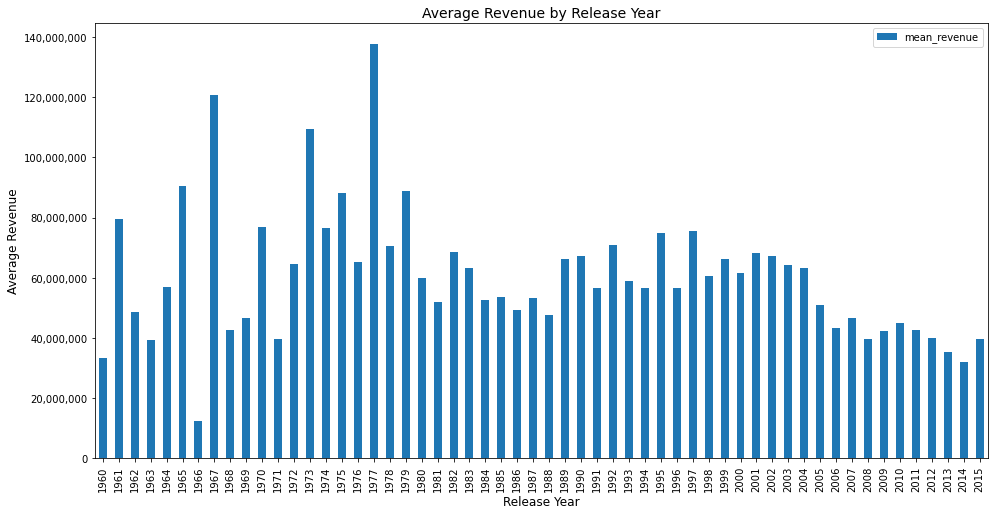

In [35]:
ax = movie_data_mean_rev_release_year.plot(title='Average Revenue By Release Year', kind='bar', figsize=(16,8), legend=True)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()]);
plt.title('Average Revenue by Release Year',fontsize=14) 
plt.xlabel('Release Year',fontsize=12) 
plt.ylabel('Average Revenue',fontsize=12);


From the plot above, we could state that since the 60s revenues have fluctuated, with the 60s and 70s being the period of having the highest revenues. 

The max revenues were made during 1977 and 1967.

### - Research Question 3 : What insights can we derive about the Top 10 movies of all time ?

Let's sort all movies and filter out the top ten movies by the variables we left for analysis (director, release_year, revenue vote_average and genre) 

In [28]:
# Sorting by all the variables 
top10_revenue = movie_data.sort_values('revenue',ascending=False)[0:10][['original_title','director','genres','vote_average','release_year','budget','revenue']]
top10_revenue

,original_title,director,genres,vote_average,release_year,budget,revenue
1386,Avatar,James Cameron,Action|Adventure|Fantasy|Science Fiction,7.1,2009,2.408869e+08,2.827124e+09
1329,Star Wars,George Lucas,Adventure|Action|Science Fiction,7.9,1977,3.957559e+07,2.789712e+09
5231,Titanic,James Cameron,Drama|Romance|Thriller,7.3,1997,2.716921e+08,2.506406e+09
10594,The Exorcist,William Friedkin,Drama|Horror|Thriller,7.2,1973,3.928928e+07,2.167325e+09
9806,Jaws,Steven Spielberg,Horror|Thriller|Adventure,7.3,1975,2.836275e+07,1.907006e+09
3,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
8889,E.T. the Extra-Terrestrial,Steven Spielberg,Science Fiction|Adventure|Family|Fantasy,7.2,1982,2.372625e+07,1.791694e+09
8094,The Net,Irwin Winkler,Crime|Drama|Mystery|Thriller|Action,5.6,1995,3.148127e+07,1.583050e+09
10110,One Hundred and One Dalmatians,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,Adventure|Animation|Comedy|Family,6.6,1961,2.917944e+07,1.574815e+09
4361,The Avengers,Joss Whedon,Science Fiction|Action|Adventure,7.3,2012,2.089437e+08,1.443191e+09


For revenue 

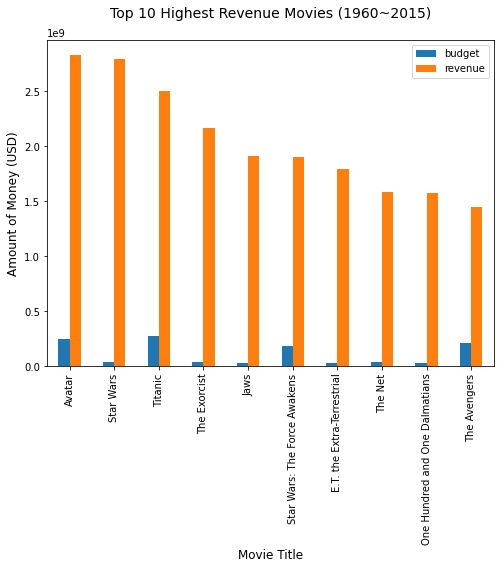

In [29]:
# Replace the index of top10_revenue with the corresponding movie name 
top10_revenue.index = top10_revenue.original_title

# Let's plot a visualisation of the Top 10 movies 
top10_revenue[['budget','revenue']].plot(kind="bar",figsize=(8,6))

plt.title('Top 10 Highest Revenue Movies (1960~2015)\n',fontsize=14) 
plt.xlabel('Movie Title',fontsize=12) 
plt.ylabel('Amount of Money (USD)',fontsize=12);

From the plot above and the sorted top 10 movies we can derive these insights : 

The top ten movies came from different eras (3 from the 70s)

Directors James Cameron and Steven Spielberg each have two films in the top ten;

the ratings of 9 of top 10 movies are higher than the average user rating 6.1.

It can also be seen from the plot above that the top 10 movies had a huge profit since the revenue far exceeds the movies budget.


<a id='conclusions'></a>
## Conclusions

In this project, I tried to investigate the TMDb movie dataset using the elements learned in the Udacity data analysis curriculum.  

In the Data Wrangling section of the report, I used these steps in order to clean the  TMDB dataset for further analysis :  

- Removing Duplicate Rows
- Changing Format Of Release Date Into Datetime Format
- Removing non significative columns 
- Dropping rows containing incorrect or inappropriate values
- Separating the genre variable into a suitable type

In the EDA section, i tried to give an answer to the questions listed in the beginning by using python based libraries to visulalise the results and provide valuable information on the movies characterists. 

For the Research Question 1 : The year 2014 year had the highest release of movies. 
For the Research Question 2 : There is no direct correlation between budget and revenue.
For the Research Question 3 : How did the revenue change over time ? 
Since the 60s revenues have fluctuated, with the 60s and 70s being the period of having the highest revenues. The max revenues were made during 1977 and 1967.

More insights about the data were made in the 4th Research Question about the TOP 10 movies of all time  : 
- These movies came from different eras (3 from the 70s)
- Directors James Cameron and Steven Spielberg had two films in the top ten;
- These movies had a huge profit : the revenue far exceeded the budget.

## Limitations

The missing data during the cleaning phase were filled by 0 values with their means. This  could've been more accurate using other methods or filling processes.

Also around half of budget data is zero. to get more accuracy we could've worked with a lower% of the data to get more accurate results but we the data used would not be representative.

In [30]:
zip -r workspace.zip

SyntaxError: invalid syntax (1632824547.py, line 1)